In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/flight_delays_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/flight_delays_test.csv')

In [3]:
# времени вылета самолета, коду авиакомпании-перевозчика, месту вылета и прилета и расстоянию между аэропортами вылета и прилета предсказать задержку вылета более 15 минут.

In [4]:
df_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [5]:
df_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [8]:
df_train.dep_delayed_15min.value_counts()

N    80956
Y    19044
Name: dep_delayed_15min, dtype: int64

In [9]:
#среднее время полёта для каждого дня примерно одинаково
df_train[['UniqueCarrier', 'Distance']].groupby('UniqueCarrier').agg({'Distance': 'mean'}).sort_values(by='Distance', ascending=False)

,Distance
UniqueCarrier,
B6,1276.878128
TZ,1189.152466
CO,1113.829257
UA,1111.682519
AA,1079.926630
HP,1013.437591
F9,892.682903
DL,888.395423
AS,868.553555


In [10]:
df_train['DepTime'].value_counts() #.groupby('Month').agg({'DepTime': 'mean'})

700     359
600     307
655     249
800     239
1500    237
       ... 
236       1
230       1
134       1
410       1
217       1
Name: DepTime, Length: 1300, dtype: int64

In [11]:
df_train.DepTime.nunique()

1300

In [12]:
#среднее время полёта от компании 
plt.figure(figsize=(10,4))
pd.DataFrame({'Comp': df_train['UniqueCarrier']}).value_counts()

Comp
WN      15082
AA       9418
DL       8128
MQ       7443
OO       7390
UA       6876
US       6482
NW       6403
XE       5901
OH       4594
CO       4334
EV       3930
FL       3039
AS       2222
YV       2128
B6       1838
HP       1378
F9       1006
DH        966
HA        762
TZ        446
AQ        234
dtype: int64

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='DayOfWeek', ylabel='DepTime'>

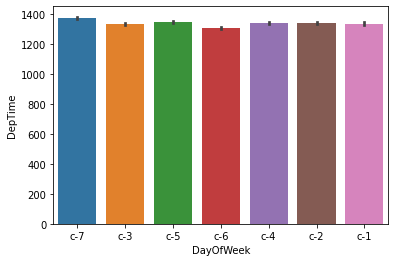

In [13]:

sns.barplot(x='DayOfWeek', y='DepTime', data=df_train)

<AxesSubplot:>

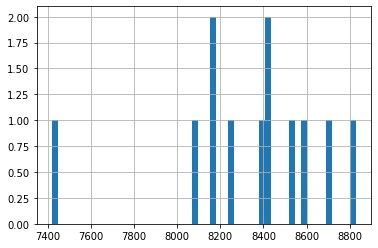

In [14]:
df_train.Month.value_counts().hist(bins=50)

<AxesSubplot:xlabel='Month'>

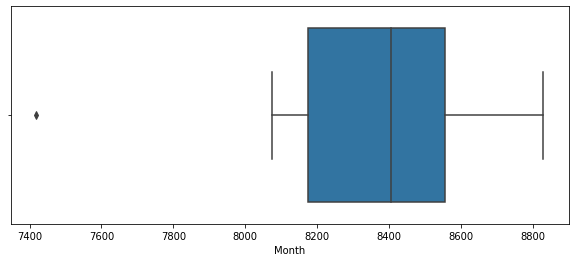

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x = df_train.Month.value_counts(), data=df_train)

In [16]:
df_train.Month.value_counts()

c-8     8830
c-7     8706
c-3     8595
c-5     8543
c-6     8414
c-4     8408
c-10    8405
c-12    8265
c-11    8178
c-9     8163
c-1     8075
c-2     7418
Name: Month, dtype: int64

<AxesSubplot:xlabel='DayofMonth'>

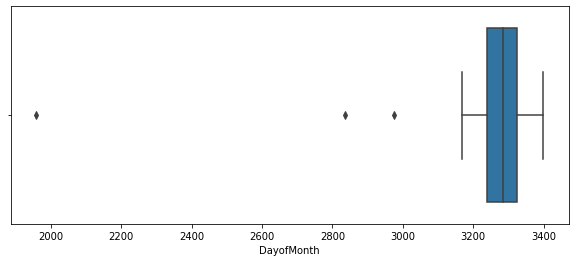

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x = df_train.DayofMonth.value_counts(), data=df_train)

In [18]:
b = []
for i in range (0, 9):
  i = df_train.columns[i]
  if df_train[i].dtype == 'O':
    a = b.append(df_train[i].nunique())
print(b)

[12, 31, 7, 22, 289, 289, 2]


In [19]:
# Создание единых фич для целого теста и целого трейна

In [20]:
Fulldf_train = pd.concat([df_train.drop('dep_delayed_15min', axis=1), df_test])

In [21]:
Fulldf_train

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732
1,c-4,c-20,c-3,1548,US,PIT,MCO,834
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [22]:
Fulldf_train1 = Fulldf_train
Fulldf_train1['Route'] = Fulldf_train['Origin'] + Fulldf_train['Dest'] #+
Fulldf_train1['Date'] = Fulldf_train['Month'] + Fulldf_train['DayofMonth'] #+

# Fulldf_train1['MeanDistance>1000'] = Fulldf_train1.Distance.apply(lambda x: 1 if x>1012 else 0) Убавляет AUC 

Fulldf_train1['Uniq_Time'] = Fulldf_train1['DepTime'].astype(str)
# Fulldf_train1['Uniq_Distance'] = Fulldf_train1['Distance'].astype(str) 



# Fulldf_train1['UniqueCarrier2'] = Fulldf_train1['UniqueCarrier'].apply(
#     lambda x: 1 if x=='WN' or x=='AA' or x=='DL' or x=='MQ' or x=='OO' or x=='UA' or x=='US' or x=='NW' or x=='XE' or x=='OH'  else 0) Убавляет AUC 

# Fulldf_train1['DepTime'] = Fulldf_train['DepTime'].astype(str) 
# Fulldf_train1['Time_Dayofweek'] = Fulldf_train['DepTime'] + Fulldf_train['DayOfWeek'] 
# Fulldf_train1['DepTime'] = Fulldf_train['DepTime'].astype(int)

#Fulldf_train1['Date'] = preprocessing.LabelBinarizer().fit_transform(Fulldf_train1['Date'])
# Fulldf_train1['Month'] = preprocessing.LabelBinarizer().fit_transform(Fulldf_train1['Month'])
# Fulldf_train1['DayofMonth'] = preprocessing.LabelBinarizer().fit_transform(Fulldf_train1['DayofMonth'])
# Fulldf_train1['DayOfWeek'] = preprocessing.LabelBinarizer().fit_transform(Fulldf_train1['DayOfWeek'])
# Fulldf_train1['UniqueCarrier'] = preprocessing.LabelBinarizer().fit_transform(Fulldf_train1['UniqueCarrier'])
# Fulldf_train1['Route'] = preprocessing.LabelBinarizer().fit_transform(Fulldf_train1['Route'])


Fulldf_train1 = Fulldf_train1.drop(['Origin', 'Dest'], axis=1) #+
Fulldf_train1 = preprocessing.OneHotEncoder().fit_transform(Fulldf_train1)
Fulldf_train1

<200000x9552 sparse matrix of type '<class 'numpy.float64'>'
	with 1800000 stored elements in Compressed Sparse Row format>

In [32]:
Fulldf_train1.DayOfWeek.nunique()

AttributeError: DayOfWeek not found

In [600]:
Fulldf_train1

<200000x9552 sparse matrix of type '<class 'numpy.float64'>'
	with 1800000 stored elements in Compressed Sparse Row format>

In [601]:
# Fulldf_train2 = Fulldf_train1[['DepTime', 'Distance']]

In [602]:
# Fulldf_train2

In [603]:
#Отделение тестовой выборки и тестисрование фич на моделях

In [37]:
y_full_train = df_train.dep_delayed_15min.apply(lambda x: 1 if x =='Y' else 0)

In [38]:
y_full_train

0        0
1        0
2        0
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: dep_delayed_15min, Length: 100000, dtype: int64

In [39]:
#отделение
X_full = Fulldf_train1[:100000]

In [40]:
X_full

<100000x9552 sparse matrix of type '<class 'numpy.float64'>'
	with 900000 stored elements in Compressed Sparse Row format>

In [53]:
X_train1, X_test_valid, y_train1, y_test_valid = train_test_split(X_full, y_full_train, test_size=0.3, random_state=17)

In [54]:
X_train1.shape

(70000, 9552)

In [609]:
# МОДЕЛИ

In [125]:
logit1 = LogisticRegression(random_state=17)
# logit.fit(X_full, y_full_train)

# precision_score(y_test_valid, logit_valid_pred)

0.7044563282702044

In [116]:

sgd1 = SGDClassifier(random_state=17, max_iter=500, class_weight='balanced', loss='log')
sgd1params = {
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}

# sgd1gridCV = RandomizedSearchCV(sgd1, sgd1params, cv=5, n_jobs=-1)
# sgd1gridCV.fit(X_train1, y_train1)
sgd1.fit(X_train1, y_train1)
sgpred = sgd1.predict_proba(X_test_valid)[:, 1]

roc_auc_score(y_test_valid, sgpred)


0.7060303707933775

In [205]:
xgb1 = xgb.XGBClassifier(random_state=17, max_iter=500, class_weight='balanced', loss='kopa')

In [211]:
knn1 = KNeighborsClassifier(n_jobs=-1)

In [313]:
LinearSVC?

Init signature:
LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    *,
    dual=True,
    tol=0.0001,
    C=1.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=1000,
)
Docstring:     
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input and the multiclass support
is handled according to a one-vs-the-rest scheme.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
penalty : {'l1', 'l2'}, default='l2'
    Specifies the norm used in the penalization. The 'l2'
    penalty is the standard used in SVC. The 'l1' leads to ``coef_``
    vectors that are sparse.

loss : {'hinge', 'squared_hinge'}, defa

In [301]:
def Modelauc (model1, model2, model3, X_test,  y_test):
    pok = []
    model_list = [model1, model2, model3]
    for model in model_list:
        model.fit(X_train1, y_train1)
        ab = model.predict_proba(X_test)
        a = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]);
        b = precision_score(y_test, model.predict(X_test));
        c = recall_score(y_test, model.predict(X_test));

        pok.append(model.predict_proba(X_test)[:, 1]);

        print('For model', str(model)[0:11], 'ROC_AUC=', a)
        print('For model', str(model)[0:11], 'Prec=', b)
        print('For model', str(model)[0:11], 'Recall=', c)
        print('____________________________________________________')
        print('                                                    ')
    # return(pok)

    tablet = pd.DataFrame({'aa':pok[0], 'ab': pok[1], 'ac': pok[2]})
    tablet['Res'] = (tablet.aa + tablet.ab + tablet.ac)/3

    print(roc_auc_score(y_test, tablet['Res']))

    print(tablet)

In [302]:
Modelauc(logit, sgd1, xgb1, X_test_valid, y_test_valid)

For model LogisticReg ROC_AUC= 0.7044563282702044
For model LogisticReg Prec= 0.48769716088328074
For model LogisticReg Recall= 0.13645189761694615
____________________________________________________
                                                    
For model SGDClassifi ROC_AUC= 0.7060303707933775
For model SGDClassifi Prec= 0.305913739439751
For model SGDClassifi Recall= 0.6072374227714034
____________________________________________________
                                                    
[22:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight, loss, max_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lear

In [311]:
def Modelauc2 (model1, model2, model3, model4, X_test):
    pok = []
    model_list = [model1, model2, model3, model4]
    for model in model_list:
        ab = model.predict_proba(X_test)
        model.fit(X_full, y_full_train)
        pok.append(model.predict_proba(X_test)[:, 1]);

        # print('For model', str(model)[0:11], 'ROC_AUC=', a)
        # print('For model', str(model)[0:11], 'Prec=', b)
        # print('For model', str(model)[0:11], 'Recall=', c)
        # print('____________________________________________________')
        # print('                                                    ')
    # return(pok)

    tablet = pd.DataFrame({'aa':pok[0], 'ab': pok[1], 'ac': pok[2], 'ad': pok[3]})
    tablet['Res'] = (tablet.aa + tablet.ab + tablet.ac + tablet.ad)/4

    # print(roc_auc_score(y_test, tablet['Res']))
    Result = pd.DataFrame({'id': range(0, 100000), 'dep_delayed_15min':  tablet['Res']}).set_index('id') #.to_csv('3Late15.csv')
    print(Result)
    # print(tablet)

In [312]:
Modelauc2(logit, sgd1, xgb1, RFgridsearch1, X_REAL_TEST)

[22:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight, loss, max_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
# X_train1, X_test_valid, y_train1, y_test_valid
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier(tree_method = "hist",  num_class=1,
                           eval_metric = ["merror", "map", "auc"])
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "roc_auc",
                             cv = 7, verbose = 3, random_state = 40)

# Fit the model
model_xgboost = xgb_rscv.fit(X_train1, y_train1)

# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   1.8s
[CV 2/7] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   1.8s
[CV 3/7] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   1.7s
[CV 4/7] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   1.8s
[CV 5/7] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   1.9s
[CV 6/7] END colsample_bytree=1.0, gamma=1.5, learning

In [231]:
model_xgboost.predict_proba(X_test_valid)[:, 1]

# roc_auc_score(y_test_valid, model_xgboost.predict_proba(X_test_valid)[:, 1])

array([0.17848416, 0.17334181, 0.16216326, ..., 0.16313471, 0.15803827,
       0.14421473], dtype=float32)

In [215]:
%%time
Forest1 = RandomForestClassifier(random_state=17, n_jobs=-1)
forest_params = {'n_estimators': range(100, 150, 10),
                 'max_depth': range(4,10 ,2), 
                 'min_samples_leaf': range(1, 8)}
            
RFgridsearch1 = RandomizedSearchCV(Forest1, forest_params, cv=5, n_jobs=-1)
RFgridsearch1.fit(X_train1, y_train1)
# roc_auc_score(y_test_valid, RFgridsearch1.predict(X_test_valid))

Wall time: 32.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(4, 10, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'n_estimators': range(100, 150, 10)})

In [217]:

RFgridsearch1.best_estimator_.

RandomForestClassifier(max_depth=8, min_samples_leaf=6, n_estimators=110,
                       n_jobs=-1, random_state=17)

In [219]:
roc_auc_score(y_test_valid, RFgridsearch1.predict_proba(X_test_valid)[:, 1])

0.6234538240588897

In [277]:
X_REAL_TEST = Fulldf_train1[df_test.shape[0]:]

In [683]:
pd.DataFrame({'id': range(0, 100000), 'dep_delayed_15min': logit.predict(X_REAL_TEST)}).set_index('id').to_csv('2Late15.csv')

In [205]:
a = 1